In [ ]:
install.packages(c("vinereg", "ggplot2", "dplyr", "tidyr", "AppliedPredictiveModeling", "VineCopula", "fda"))

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘locfit’, ‘ash’, ‘FNN’, ‘kernlab’, ‘mclust’, ‘multicool’, ‘pracma’, ‘rngWELL’, ‘pcaPP’, ‘hdrcde’, ‘ks’, ‘bitops’, ‘randtoolbox’, ‘plotrix’, ‘rpart.plot’, ‘rainbow’, ‘RCurl’, ‘rvinecopulib’, ‘kde1d’, ‘assertthat’, ‘RcppEigen’, ‘BH’, ‘wdm’, ‘RcppThread’, ‘CORElearn’, ‘plyr’, ‘reshape2’, ‘ellipse’, ‘mvtnorm’, ‘ADGofTest’, ‘fds’, ‘deSolve’




In [ ]:
install.packages(c("vinereg", "ggplot2", "dplyr", "tidyr", "AppliedPredictiveModeling", "VineCopula", "fda"))

In [7]:
library(vinereg)
require(ggplot2)
require(dplyr)
require(tidyr)
require(AppliedPredictiveModeling)
library(fda)

rm(list=ls())

In [8]:
# cargamos los datos
load("/content/LSTNDVIpts.RData")

In [9]:
#Visualizamos los primeros datos de cada data frame y su forma
head(Dlst2)
head(Dndvi2)

,datos.2,datos.3,datos.4,datos.6,datos.7,datos.8,datos.9,datos.10,datos.11,datos.13,⋯,datos.201,datos.202,datos.203,datos.204,datos.205,datos.206,datos.207,datos.208,datos.209,datos.210
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,21.43031,21.27650,23.04703,14.27639,18.51132,23.22135,21.67640,22.29507,22.15835,21.72426,⋯,21.10218,20.98255,22.01137,27.47679,23.07779,23.04361,22.41128,23.29655,22.44546,20.83216
2,26.13350,23.98015,36.41060,25.38196,24.84669,33.87339,33.89231,27.91846,29.15033,37.55400,⋯,33.57750,27.43577,28.04759,26.95725,36.33448,34.21869,36.55010,34.46305,36.33956,28.91045
3,38.99210,38.89981,40.60540,29.71217,14.36184,39.29972,37.91200,26.27706,29.88677,39.73722,⋯,37.50184,40.70452,40.07903,48.18657,39.74064,36.90026,41.00873,34.43587,40.97796,12.08202
4,35.05453,34.95200,36.35680,27.81859,27.46311,34.25814,34.50082,31.88261,38.22646,35.60142,⋯,34.28890,36.02525,35.72789,45.71876,35.71421,34.65805,36.99255,33.70784,35.76548,32.52178
5,43.63718,33.17973,45.69141,31.87236,33.50959,38.40078,41.61713,39.35782,42.41011,45.34961,⋯,40.58489,43.19626,44.36522,50.84237,42.07173,43.53806,45.08301,41.13519,44.13963,40.15764
6,34.48043,33.42164,37.06488,26.84100,26.07755,34.29139,33.98058,10.00045,13.88332,44.09520,⋯,34.32554,35.37939,34.87754,41.53769,46.39553,35.14200,36.87809,34.62291,37.11280,37.82655


,datos.2,datos.3,datos.4,datos.6,datos.7,datos.8,datos.9,datos.10,datos.11,datos.13,⋯,datos.201,datos.202,datos.203,datos.204,datos.205,datos.206,datos.207,datos.208,datos.209,datos.210
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.06815710,0.09955841,0.06825064,0.2600433,0.7076052,0.3440751,0.3819565,0.6159417,0.3186409,0.07981670,⋯,0.1331171,0.08760167,0.1532820,0.02004867,0.3462487,0.5859301,0.08030228,0.2255751,0.09487126,0.4025457
2,0.13419189,0.25138372,0.06667200,0.3266099,0.6864705,0.3612706,0.3908429,0.6857731,0.3849205,0.10178702,⋯,0.2171501,0.14361027,0.1474179,0.04558608,0.2794482,0.5367887,0.08629168,0.2681260,0.11430092,0.4430785
3,0.08359544,0.10281015,0.05756364,0.3012847,0.6742708,0.2918369,0.4465471,0.6891246,0.3860856,0.08425577,⋯,0.2453105,0.06658349,0.1744812,0.02099859,0.3040636,0.7970120,0.07391349,0.2605605,0.12296999,0.4335298
4,0.07615615,0.12552658,0.08334237,0.2927930,0.6190314,0.2599301,0.3092119,0.6791221,0.4212711,0.08348811,⋯,0.2491909,0.10094278,0.1631438,0.04456396,0.1958299,0.4823360,0.10180166,0.2770370,0.12128323,0.4125029
5,0.10358041,0.13581500,0.09485308,0.4183242,0.7974163,0.5285875,0.4926508,0.8402793,0.3851463,0.09263365,⋯,0.2600770,0.08803450,0.1918353,0.05777428,0.3926235,0.4525258,0.10499287,0.3352796,0.14829174,0.4981871
6,0.10205212,0.13552190,0.07474834,0.3380260,0.7303713,0.3870984,0.4151791,0.5620583,0.4060087,0.18101697,⋯,0.2264134,0.10019950,0.1765547,0.03834546,0.2085837,0.5581556,0.09213687,0.2708463,0.13041269,0.4312555


In [32]:
#cargamos el archivo STtD.R
source("/content/STtD.R")

In [ ]:
# ptsM

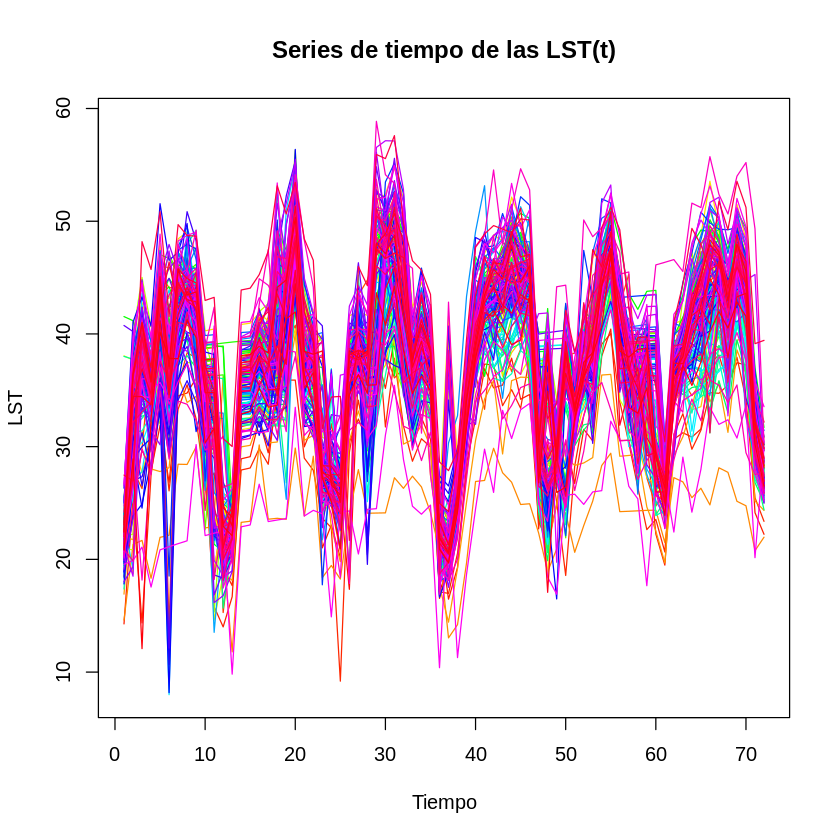

In [11]:
# Grafica de las series de tiempo de LST
matplot(
  x = 1:nrow(Dlst2),
  y = as.matrix(Dlst2),
  type = "l",
  lty = 1,
  col = rainbow(ncol(Dlst2)),
  xlab = "Tiempo",
  ylab = "LST",
  main = "Series de tiempo de las LST(t)"
)

In [33]:
lst_23 <- Dlst2[61:72, ]
lst_22 <- Dlst2[49:60, ]
lst_21 <- Dlst2[37:48, ]

ndvi_23_19 <- Dndvi2[13:72, ]
ndvi_22_18 <- Dndvi2[1:60, ]

Y <- STtDfn(t(cbind(lst_23, lst_22)))
X1 <- STtDfn(t(cbind(lst_22, lst_21)))
X2 <- STtDfn(t(cbind(ndvi_23_19, ndvi_22_18)))
X <- cbind(X1, X2)

In [ ]:
length(Y)

[1] 316

In [ ]:
dim(X)
head(X)

[1] 316   2

,X1,X2
datos.2,0.000000000,-0.22557029
datos.3,0.005980008,-0.07339897
datos.4,0.096667169,-0.26861228
datos.6,-0.254573538,0.07234412
datos.7,-0.311331291,0.40101199
datos.8,0.043358616,0.08640613


In [15]:
cat("La correlación de Spearman es:", cor(Y, X1, method = "spearman"),"\n")
cat("La correlación de es:", cor(Y, X1), "\n")
cat("\n")
cat("La correlación de Spearman  entre la respuesta y el segundo predictor es:", cor(Y, X2, method = "spearman"),"\n")
cat("La correlación  entre la respuesta y el segundo  predictor es :", cor(Y, X2), "\n")

La correlación de Spearman es: 0.5999532 
La correlación de es: 0.7002661 

La correlación de Spearman  entre la respuesta y el segundo predictor es: -0.6584819 
La correlación  entre la respuesta y el segundo  predictor es : -0.6803726 


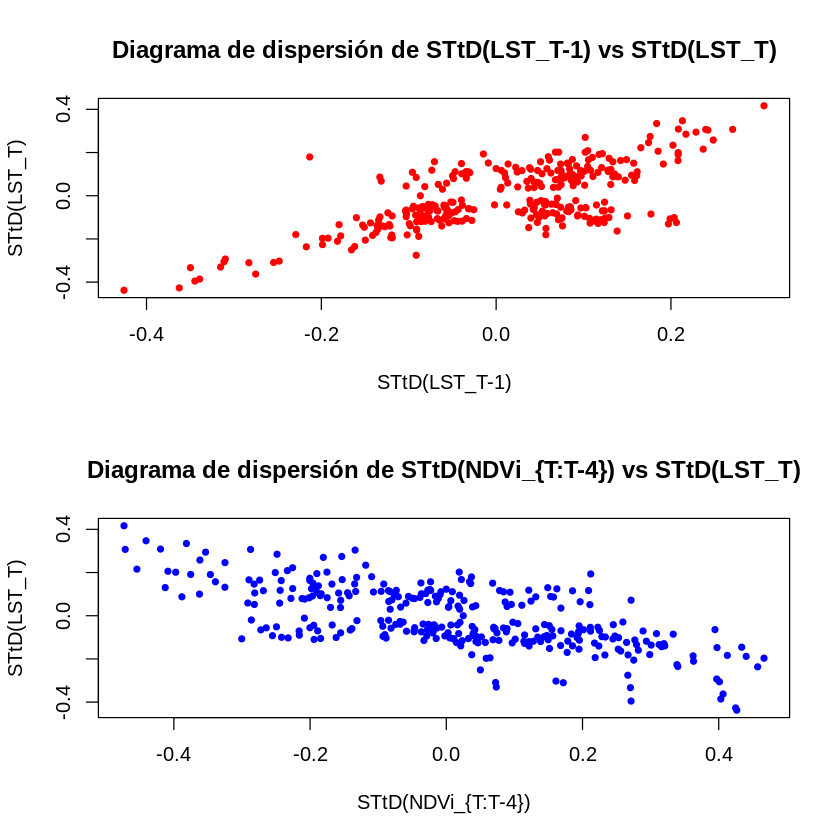

In [16]:
par(mfrow=c(2,1))

#Gráfico de
matplot(
  x = X1,
  y = Y,
  pch = 20,
  col = "red",
  xlab = "STtD(LST_T-1)",
  ylab = "STtD(LST_T)",
  main = "Diagrama de dispersión de STtD(LST_T-1) vs STtD(LST_T)"
)


matplot(
  x = X2,
  y = Y,
  pch = 20,
  col = "blue",
  xlab = "STtD(NDVi_{T:T-4})",
  ylab = "STtD(LST_T)",
  main = "Diagrama de dispersión de STtD(NDVi_{T:T-4}) vs STtD(LST_T)"
)

In [17]:
intervalo_17_22_STtD.NDVi <- which( X2 > 0.17 & X2 < 0.22 )
indice_maximo_17_22_STtD.LST <- which(Y == max(Y[intervalo_17_22_STtD.NDVi]))

In [18]:
intervalo_17_22_STtD.NDVi

datos.20  datos.53  datos.67  datos.91 datos.105 datos.117 datos.123 datos.133 
       16        36        45        61        73        82        85        91 
 datos.20  datos.67 datos.105 datos.123 datos.133 datos.151 datos.153 datos.156 
      174       203       231       243       249       263       264       267 
datos.157 datos.162 datos.175 datos.181 datos.193 
      268       272       283       288       299

In [19]:
indice_maximo_17_22_STtD.LST

datos.53 
      36

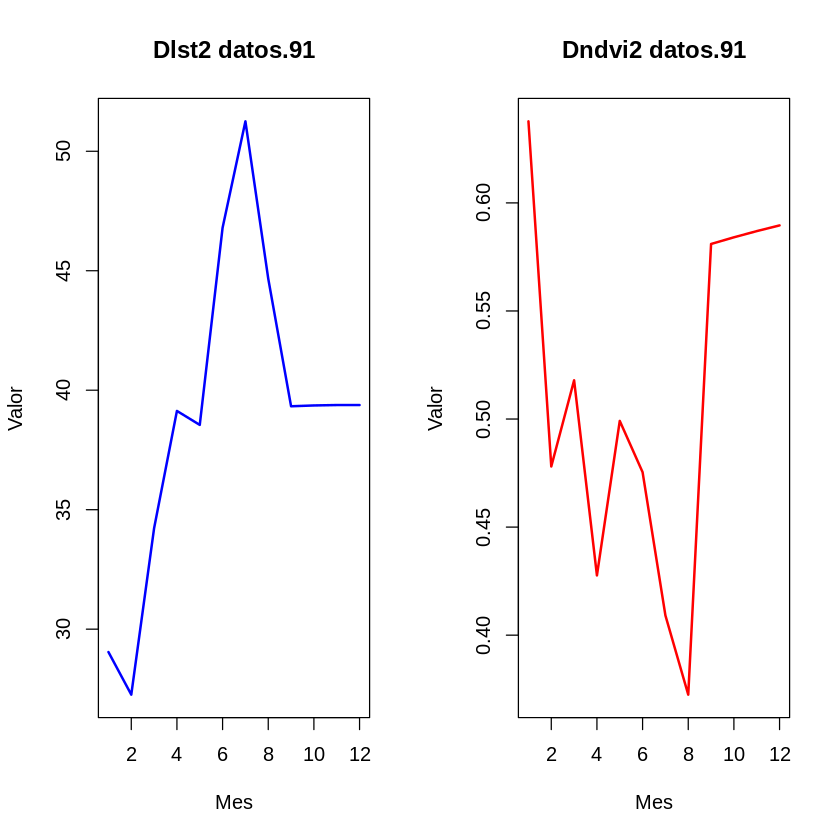

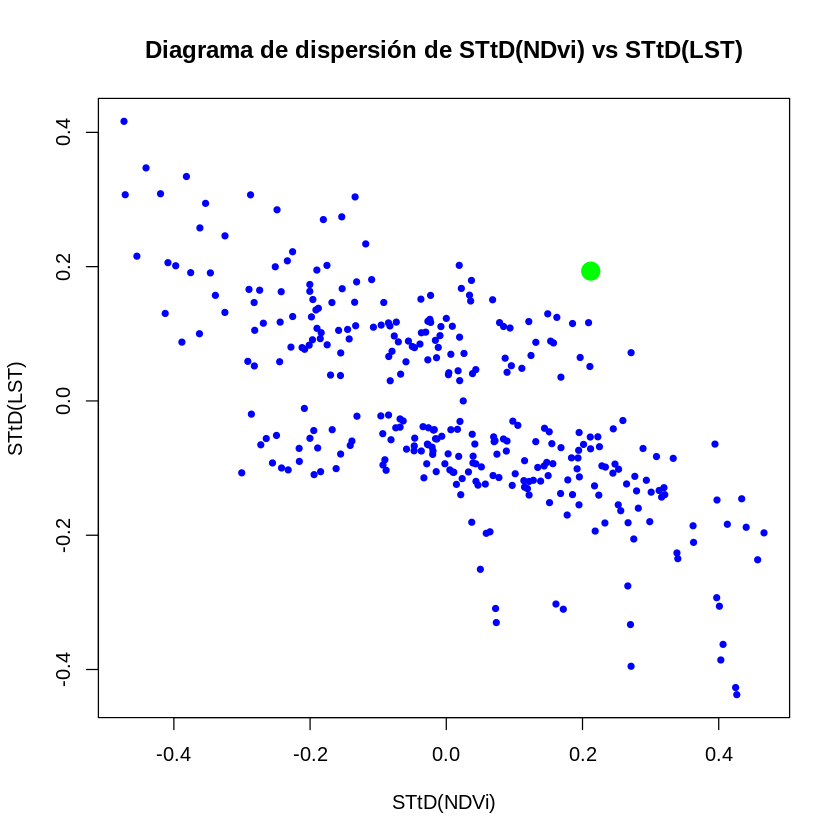

In [20]:
# Configurar el grid
par(mfrow=c(1, 2))

# Primer gráfico: Dlst2
plot(Dlst2[49:60,'datos.91'], type="l", col="blue", lwd=2,
     xlab="Mes", ylab="Valor", main="Dlst2 datos.91")

# Segundo gráfico: Dndvi2
plot(Dndvi2[49:60, 'datos.91'], type="l", col="red", lwd=2,
     xlab="Mes", ylab="Valor", main="Dndvi2 datos.91")
# Restablecer la configuración gráfica
par(mfrow=c(1, 1))

# Tercer gráfico: Diagrama de dispersión
matplot(
  x = X2,
  y = Y,
  pch = 20,
  col = "blue",
  xlab = "STtD(NDVi)",
  ylab = "STtD(LST)",
  main = "Diagrama de dispersión de STtD(NDvi) vs STtD(LST)"
)

# Agregar el punto específico al gráfico
points(X2[indice_maximo_17_22_STtD.LST], Y[indice_maximo_17_22_STtD.LST], col = "green", pch = 19, cex = 2)

In [21]:
dat <- data.frame(y = Y, x = X)
head(dat)

,y,x.X1,x.X2
,<dbl>,<dbl>,<dbl>
datos.2,0.12570365,0.000000000,-0.22557029
datos.3,0.11739544,0.005980008,-0.07339897
datos.4,0.11575121,0.096667169,-0.26861228
datos.6,-0.30915545,-0.254573538,0.07234412
datos.7,-0.30577532,-0.311331291,0.40101199
datos.8,0.06366452,0.043358616,0.08640613


In [22]:
fit_vine_par <- vinereg(
  y ~ x.X1 + x.X2,
  data = dat,
  family_set = c("onepar", "t"),
  selcrit = "aic"
)

La función vinereg prueba diferentes familias de copulas y selecciona automáticamente la que mejor ajuste a los datos, basándose en un criterio de selección (por ejemplo, AIC).

En nuestro modelo, usamos diferentes familias de copulas para capturar la dependencia entre las variables explicativas (X) y la respuesta (Y). Algunas familias importantes incluyen:

    Clayton, que captura dependencias fuertes en eventos bajos.
    Gumbel, para dependencias en eventos altos.
    t-Student, para relaciones complejas que incluyen eventos extremos en ambas colas.

El modelo vinereg incluye penalización para evitar el sobreajuste y garantizar que seleccionamos el modelo más simple posible que explique los datos. Esto se hace usando el criterio de Akaike (AIC), que evalúa el balance entre el ajuste del modelo y su complejidad.

Penalizando la complejidad del modelo, Busca un balance entre el ajuste al conjunto de datos y la simplicidad del modelo.

In [23]:
summary(fit_vine_par$vine)

tree,edge,conditioned,conditioning,var_types,family,rotation,parameters,df,tau,loglik
<int>,<int>,<list>,<list>,<chr>,<chr>,<int>,<list>,<dbl>,<dbl>,<dbl>
1,1,"1, 2",,"c,c",t,0,"0.6713671, 2.0000010",2,0.4685852,135.84551
1,2,"2, 3",,"c,c",t,0,"-0.6100861, 4.5812513",2,-0.4177303,84.49518
2,1,"1, 3",2,"c,c",gaussian,0,-0.453274,1,-0.2994882,34.46329


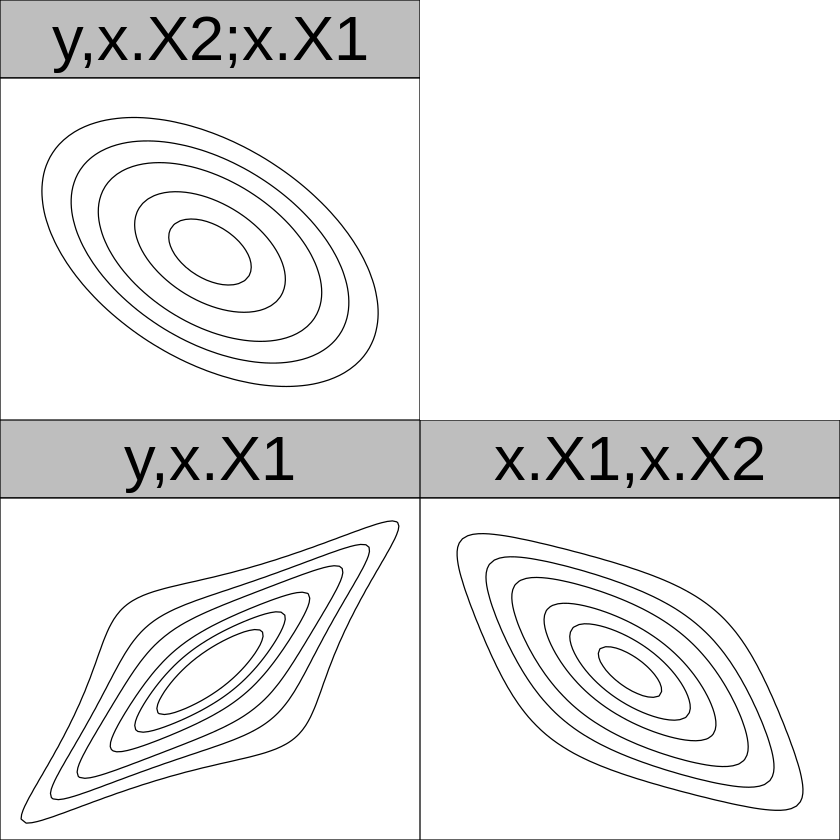

In [ ]:
contour(fit_vine_par$vine)

Este gráfico muestra las relaciones dependientes entre las variables del modelo ajustado usando copulas Vine. Cada conjunto de contornos representa la dependencia entre dos variables, condicionada o no por otras variables.

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


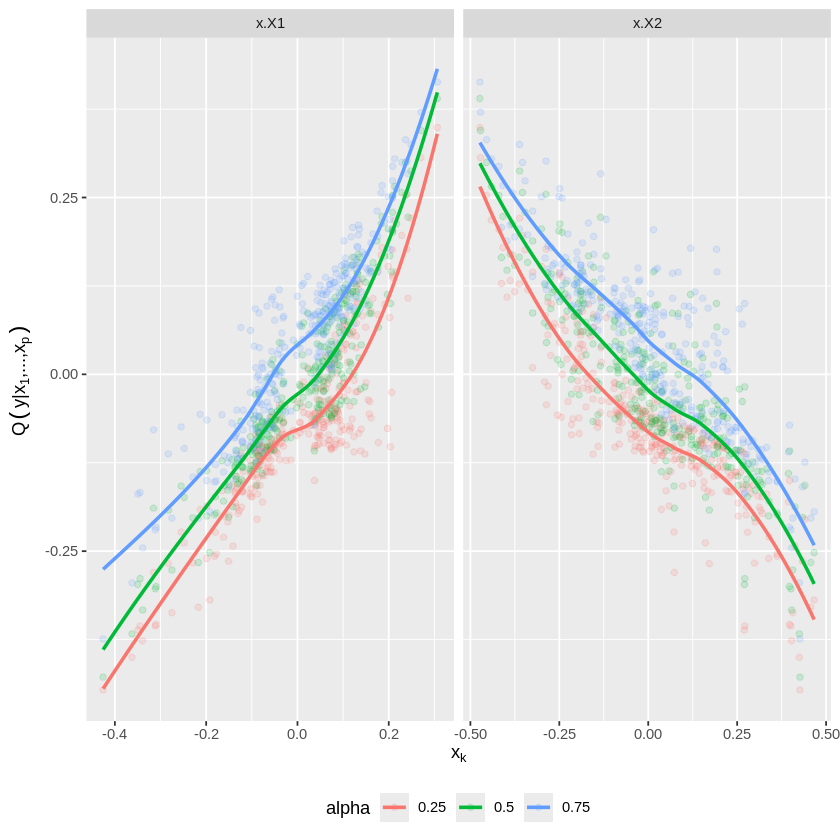

In [ ]:
# Niveles de cuantiles
alpha_vec <- c(0.25, 0.5, 0.75)

# Predicciones para los nuevos valores de alpha
pred_vine_par <- fitted(fit_vine_par, alpha = alpha_vec)

# Generar un nuevo gráfico con los valores actualizados
plot_effects(fit_vine_par, alpha = alpha_vec)

El gráfico muestra los efectos marginales de las variables predictoras (x.X1 y x.X2) sobre la respuesta (y) para diferentes niveles de cuantiles (α) especificados en alpha_vec

El uso de copulas Vine permite capturar estas relaciones complejas, modelando tanto las dependencias no lineales como las diferencias entre los niveles de cuantiles.

Tomamos un valor del NDVi en el año 2023, tranformada en la STtD y con esa, se tiene en la regresion cuantil dos valores condicional de la LST, se tiene dos valores de STtD de la LST

In [117]:
LST23 <- cbind( Dlst2[61:72, ], Dlst2[49:60, ] )

In [118]:
STtD.NDVi23 <- STtDfn(t(Dndvi2[61:72, ]))

In [119]:
STtD.NDVi23_m05_m_04 <- which( STtD.NDVi23 > -0.5 & X2 < -0.4 )

In [120]:
STtD.NDVi23_m05_m_04

datos.75 datos.142 datos.191 datos.204  datos.75 datos.191 datos.204 
       53        99       139       152       211       297       310

In [121]:
print(Y[STtD.NDVi23_m05_m_04])

 datos.75 datos.142 datos.191 datos.204  datos.75 datos.191 datos.204 
0.3085816 0.1303011 0.4164310 0.3470820 0.2059126 0.3071014 0.2155938 


In [122]:
which( Y == Y[STtD.NDVi23_m05_m_04[4]] )

datos.204 
      152

In [123]:
which( Y == Y[STtD.NDVi23_m05_m_04[7]] )

datos.204 
      310

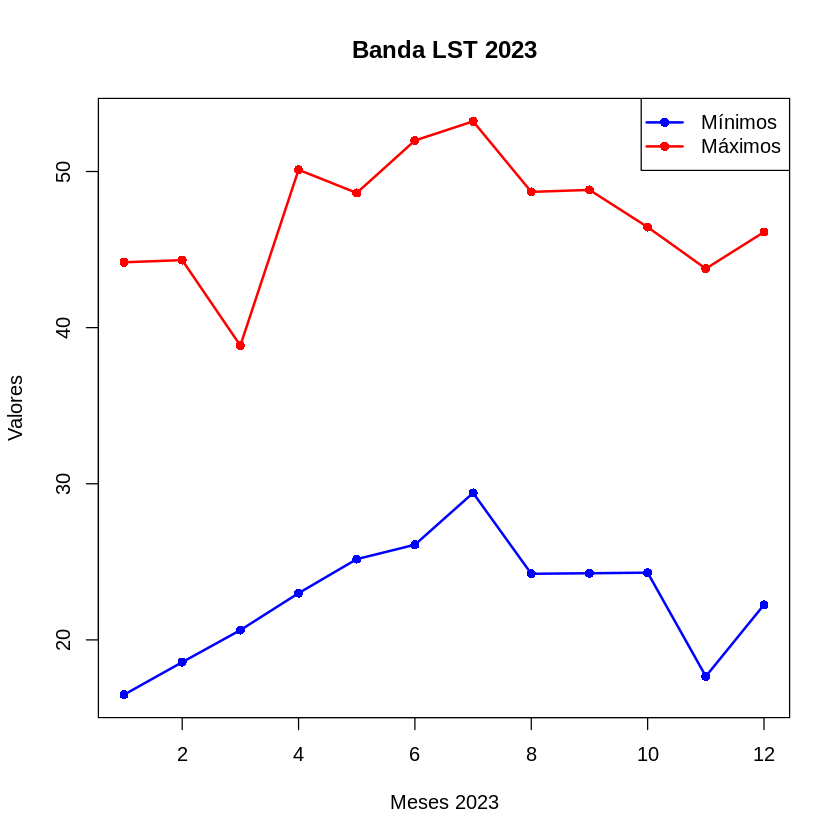

In [125]:
subset_LST23 <- LST23[, 153:309]
# Calcular el mínimo y máximo por fila
min_values <- apply(subset_LST23, 1, min) # Mínimos por fila
max_values <- apply(subset_LST23, 1, max) # Máximos por fila

# Crear un gráfico base para los valores mínimos
plot(1:12, min_values, type = "o", col = "blue", pch = 16, lwd = 2,
     xlab = "Meses 2023", ylab = "Valores",
     main = "Banda LST 2023",
     ylim = range(c(min_values, max_values)))

# Agregar los valores máximos al gráfico
lines(1:12, max_values, type = "o", col = "red", pch = 16, lwd = 2)

# Agregar una leyenda para distinguir los mínimos y máximos
legend("topright", legend = c("Mínimos", "Máximos"),
       col = c("blue", "red"), pch = 16, lwd = 2)


In [126]:
which( Y == Y[STtD.NDVi23_m05_m_04[3]] )
which( Y == Y[STtD.NDVi23_m05_m_04[6]] )

datos.191 
      139

datos.191 
      297

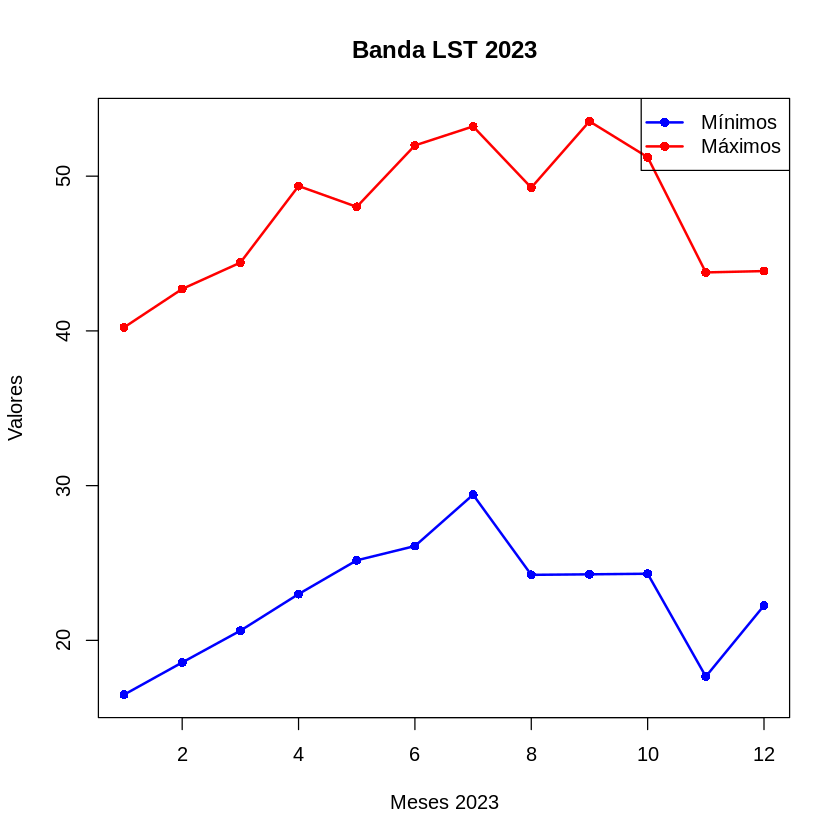

In [128]:
subset_LST23 <- LST23[, 140:296]
# Calcular el mínimo y máximo por fila
min_values <- apply(subset_LST23, 1, min) # Mínimos por fila
max_values <- apply(subset_LST23, 1, max) # Máximos por fila

# Crear un gráfico base para los valores mínimos
plot(1:12, min_values, type = "o", col = "blue", pch = 16, lwd = 2,
     xlab = "Meses 2023", ylab = "Valores",
     main = "Banda LST 2023",
     ylim = range(c(min_values, max_values)))

# Agregar los valores máximos al gráfico
lines(1:12, max_values, type = "o", col = "red", pch = 16, lwd = 2)

# Agregar una leyenda para distinguir los mínimos y máximos
legend("topright", legend = c("Mínimos", "Máximos"),
       col = c("blue", "red"), pch = 16, lwd = 2)


In [129]:
which( Y == Y[STtD.NDVi23_m05_m_04[1]] )
which( Y == Y[STtD.NDVi23_m05_m_04[5]] )

datos.75 
      53

datos.75 
     211

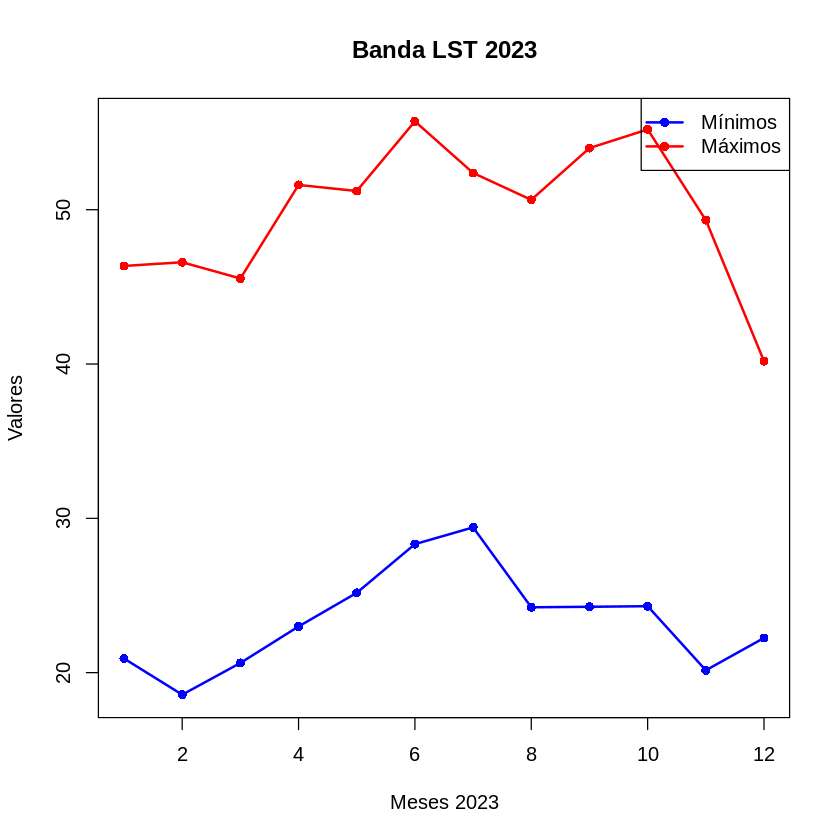

In [131]:
subset_LST23 <- LST23[, 54:210]
# Calcular el mínimo y máximo por fila
min_values <- apply(subset_LST23, 1, min) # Mínimos por fila
max_values <- apply(subset_LST23, 1, max) # Máximos por fila

# Crear un gráfico base para los valores mínimos
plot(1:12, min_values, type = "o", col = "blue", pch = 16, lwd = 2,
     xlab = "Meses 2023", ylab = "Valores",
     main = "Banda LST 2023",
     ylim = range(c(min_values, max_values)))

# Agregar los valores máximos al gráfico
lines(1:12, max_values, type = "o", col = "red", pch = 16, lwd = 2)

# Agregar una leyenda para distinguir los mínimos y máximos
legend("topright", legend = c("Mínimos", "Máximos"),
       col = c("blue", "red"), pch = 16, lwd = 2)
